# 추천 레시피(youtube+만개의레시피)

필요 모듈, 패키지, 라이브러리 설치

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 파이참에서 konlpy 설치되어 있으면 건너 뛰기
# !pip install konlpy

In [3]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 불러오기
- 유튜브 댓글 크롤링 + 만개의 레시피 댓글 크롤링 데이터 합치기
- 유튜브의 레시피와 만개 레시피를 합치는 목적

In [4]:
df1=pd.read_csv('/content/drive/MyDrive/Zipbob_textmining/youtubecomment.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/Zipbob_textmining/recipe_10000_comment.csv',encoding='cp949')

In [5]:
df1.head()

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디


In [6]:
df2.head()

,agricultural,title,comment
0,귀리,오트밀쿠키귀리로_만든_건강쿠키,엄청 쉬운데 맛은 대박입니당♡♡♡ 감사해요
1,귀리,사과바나나귀리요거트우유,집에 우유+귀리+사과 밖에 없어서 만들어 먹었는데 너무 맛있어요!! 아침 대용으로 ...
2,귀리,사과바나나귀리요거트우유,"간편하면서도 맛있고, 건강해지는 느낌이에요. 좋은 레시피 감사합니다."
3,귀리,사과바나나귀리요거트우유,너무너무 잘 마셨어요^^ 넘 맛있어요 고맙습니다
4,귀리,귀리강정,너무 맛있어요~ 넣는 속재료는 있는대로 조금바꿔서하긴했는데 그램수는비슷하게했더니 달...


In [7]:
df1.shape # 유튜브 데이터 차원

(9182, 3)

In [8]:
df2.shape # 만개레시피 데이터 차원

(3757, 3)

In [9]:
# 각 데이터의 결측치 제거
df1=df1.dropna(how='any')
df2=df2.dropna(how='any')

In [10]:
df1.shape, df2.shape

((9179, 3), (3756, 3))

In [11]:
df1['comment'][:10]

0    대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1                                             맛나겠네요 ㅎㅎ
2                                          믹서기를 사야겄네..
3            골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4                                             나중에 해줘야디
5             항상 감사합니다!백쌤 쉽게 멋나게 잘 배우고 따라 해볼게유 고맙습니다~♡
6                                   Vega: 다진김치 추가~~요^^
7    신김치 잘게 썰어 넣으면 훨씬 맛있고요 검은콩으로 만들면 더 고소해요~ ㅎ 몇달전에...
8              이거 진짜 간단하고 좋네요. 먹는다고 사놓고 안 쓰는 콩 쓰기 최고인듯
9                                           비지로 못 쓰나요?
Name: comment, dtype: object

In [12]:
df2['comment'][:10]

0                              엄청 쉬운데 맛은 대박입니당♡♡♡ 감사해요
1    집에 우유+귀리+사과 밖에 없어서 만들어 먹었는데 너무 맛있어요!! 아침 대용으로 ...
2               간편하면서도 맛있고, 건강해지는 느낌이에요. 좋은 레시피 감사합니다.
3                           너무너무 잘 마셨어요^^ 넘 맛있어요 고맙습니다
4    너무 맛있어요~ 넣는 속재료는 있는대로 조금바꿔서하긴했는데 그램수는비슷하게했더니 달...
5                     그대로 만들었어요 피곤해하는 신랑위해 내일 아침 짜잔 ㅎㅎ
6                                           잘되네요 잘먹을께요
7                빨리 굳어지지 않는건 시럽이 넘 많이 들어가서 그럴까요?...^^;
8                                 영양있는 간식으로 으뜸인데요 최고네요
9                                   아이들 간식으로 좋겠네요...^^
Name: comment, dtype: object

## 데이터셋 통합
- 컬럼명을 통일하고 행 단위로 병합

In [13]:
df1 = df1.rename(columns={'title':'agri', 'video':'recipe'})
df2 = df2.rename(columns={'agricultural':'agri', 'title':'recipe'})

In [14]:
df1.head(3)

,agri,recipe,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..


In [15]:
df2.head(3)

,agri,recipe,comment
0,귀리,오트밀쿠키귀리로_만든_건강쿠키,엄청 쉬운데 맛은 대박입니당♡♡♡ 감사해요
1,귀리,사과바나나귀리요거트우유,집에 우유+귀리+사과 밖에 없어서 만들어 먹었는데 너무 맛있어요!! 아침 대용으로 ...
2,귀리,사과바나나귀리요거트우유,"간편하면서도 맛있고, 건강해지는 느낌이에요. 좋은 레시피 감사합니다."


In [16]:
df = pd.concat([df1, df2], axis=0)

In [17]:
# 잘 통합되었나 확인하기
df[:5]
# df[-3:]

,agri,recipe,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디


# 전체 댓글의 최다빈도 상위 20개 단어 추출

## 불용어 사전
- 불용어 사전은 동일하게 활용

온라인에 등록된 불용어 사전 불러온 후 적용

In [18]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

분석하고자 하는 데이터셋의 특화된 불용어들 처리

In [19]:
mangae_stopwords = list(df['agri'].unique()) # 재료 고유값

In [20]:
etc_stopwords = ['레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고',
                 '백쌤', '백종원', '선생님', '쌤', '주부', '보다', '에어프라이어','요식업','겁나','썸네일','존귀','썸넬'] # 기타 해석에 제한걸리는 불용어 추가
for k in etc_stopwords :
  mangae_stopwords.append(k) # 불용어 추가

In [21]:
print(mangae_stopwords)

['콩', '메밀', '고구마', '감자', '수수', '배추', '토마토', '파', '가지', '새우', '양배추', '시금치', '갓', '수박', '참외', '오이', '호박', '무', '열무', '귀리', '쌀', '갈치', '감귤', '레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고', '백쌤', '백종원', '선생님', '쌤', '주부', '보다', '에어프라이어', '요식업', '겁나', '썸네일', '존귀', '썸넬']


최종 불용어사전

In [22]:
for word in mangae_stopwords:
    stopwords.append(word)

## 전체 word_count_dictlist 추출

In [23]:
import re
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# lambda로 함수를 적용한 카운터벡터를 만들고
# 텍스트 분석을 원하는 데이터셋의 컬럼에다가 적용하면 됨

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))

In [25]:
bow_vect = vect.fit_transform(df['comment'].tolist())

In [26]:
word_list = vect.get_feature_names()

In [27]:
print(word_list[:25]) # 명사 토큰화 결과

['가가', '가감', '가게', '가격', '가공', '가구', '가구라', '가기', '가까이', '가끔', '가나', '가네욬', '가늠', '가능', '가니쉬', '가다가', '가다랑어', '가다랑어포', '가당', '가도', '가득', '가라오케', '가락', '가락동', '가래떡']


In [28]:
count_list = bow_vect.toarray().sum(axis=0)

In [29]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
# bow_vect 크기 확인용
bow_vect.shape

(12935, 6552)

In [32]:
word_count_dict = dict(zip(word_list, count_list)) # 내장함수 zip으로 매칭

In [ ]:
# 보고싶으면 출력. 코드 올릴 때는 제외하기
# word_count_dict
# len(word_count_dict)

## 분석에 활용할 리스트 타입으로 변환

In [34]:
word_count_dictlist = list(word_count_dict.keys())

In [35]:
word_count_dictlist2 = []
for k, v in zip(word_count_dict.keys(), word_count_dict.values()):
  word_count_dictlist2.append([k, v])

## 한국어 긍정/부정 사전 불러오기

In [36]:
import json

In [37]:
with open('/content/drive/MyDrive/Zipbob_textmining/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    SentiWorddata = json.load(f)

### 전체 댓글 데이터셋 긍정/부정 비율 확인하기
- 추천 레시피 결과에 영향X

In [38]:
pos_cnt = 0
pos_sum = 0
neg_cnt = 0
neg_sum = 0

for i in range(0, len(SentiWorddata)):
  for k in range(0, len(word_count_dictlist2)) :                # 데이터셋에서 최종 추출된 [단어, 빈도수] 리스트 길이만큼
    if SentiWorddata[i]['word'] == word_count_dictlist2[k][0]: # 사전에 등록된 word에 데이터셋단어가 있으면
      knuword = [SentiWorddata[i]['word_root'], int(SentiWorddata[i]['polarity'])]   # word_root어근과 점수 변수를 만들어서

      if int(SentiWorddata[i]['polarity']) >= 0 :         # 그 어근의 점수가 0 이상이면
        pos_cnt += 1         # 긍정개수 1 증가
        pos_sum += int(SentiWorddata[i]['polarity'])         # 긍정 점수 추가 # 0, 1, 2점
      else :
        neg_cnt += 1
        neg_sum += int(SentiWorddata[i]['polarity'])        # 부정 점수 추가 0, -1, -2점

In [39]:
pos_cnt, neg_cnt

(109, 104)

In [40]:
pos_sum, neg_sum

(152, -149)

In [41]:
pos_rate = pos_cnt/(pos_cnt+neg_cnt)
neg_rate = neg_cnt/(pos_cnt+neg_cnt)
print("긍정 비율 : %.3f, 부정 비율 : %.3f" % (pos_rate, neg_rate))

긍정 비율 : 0.512, 부정 비율 : 0.488


## 빈도수 상위 20개 단어 출력하여 저장

In [42]:
word_count_dictlist2.sort(key=lambda x: -x[1])

In [43]:
word_count_dictlist2[-10:]

[['흐믈흐믈', 1],
 ['흐미', 1],
 ['흐트러져', 1],
 ['흐트러지네', 1],
 ['흙맛', 1],
 ['흥해랏', 1],
 ['히힛', 1],
 ['힌번', 1],
 ['힐러', 1],
 ['힙니', 1]]

In [44]:
sorted_top20 = word_count_dictlist2[:21]

## sorted_top20 최종

In [45]:
sorted_top20

[['진짜', 872],
 ['정말', 675],
 ['설탕', 470],
 ['해먹', 440],
 ['오늘', 427],
 ['음식', 417],
 ['최고', 415],
 ['버터', 364],
 ['보고', 325],
 ['간장', 301],
 ['그냥', 297],
 ['영상', 294],
 ['가루', 292],
 ['소스', 278],
 ['한번', 275],
 ['땅콩', 274],
 ['콩국수', 274],
 ['옥수수', 270],
 ['덕분', 269],
 ['대신', 253],
 ['재료', 251]]

### 빈도수 시각화

barplot에 사용된 Nanum.ttf file은 repository에 존재하지 않습니다.

In [46]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한국어 깨짐은 한국어 폰트를 해당 디렉토리에 저장하고 경로 설정하여 실행
path = "/content/drive/MyDrive/Zipbob_textmining/Nanum.TTF"

In [47]:
fontprop = fm.FontProperties(fname=path, size=13) # 글자 크기 조정하여 plot에 적용

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


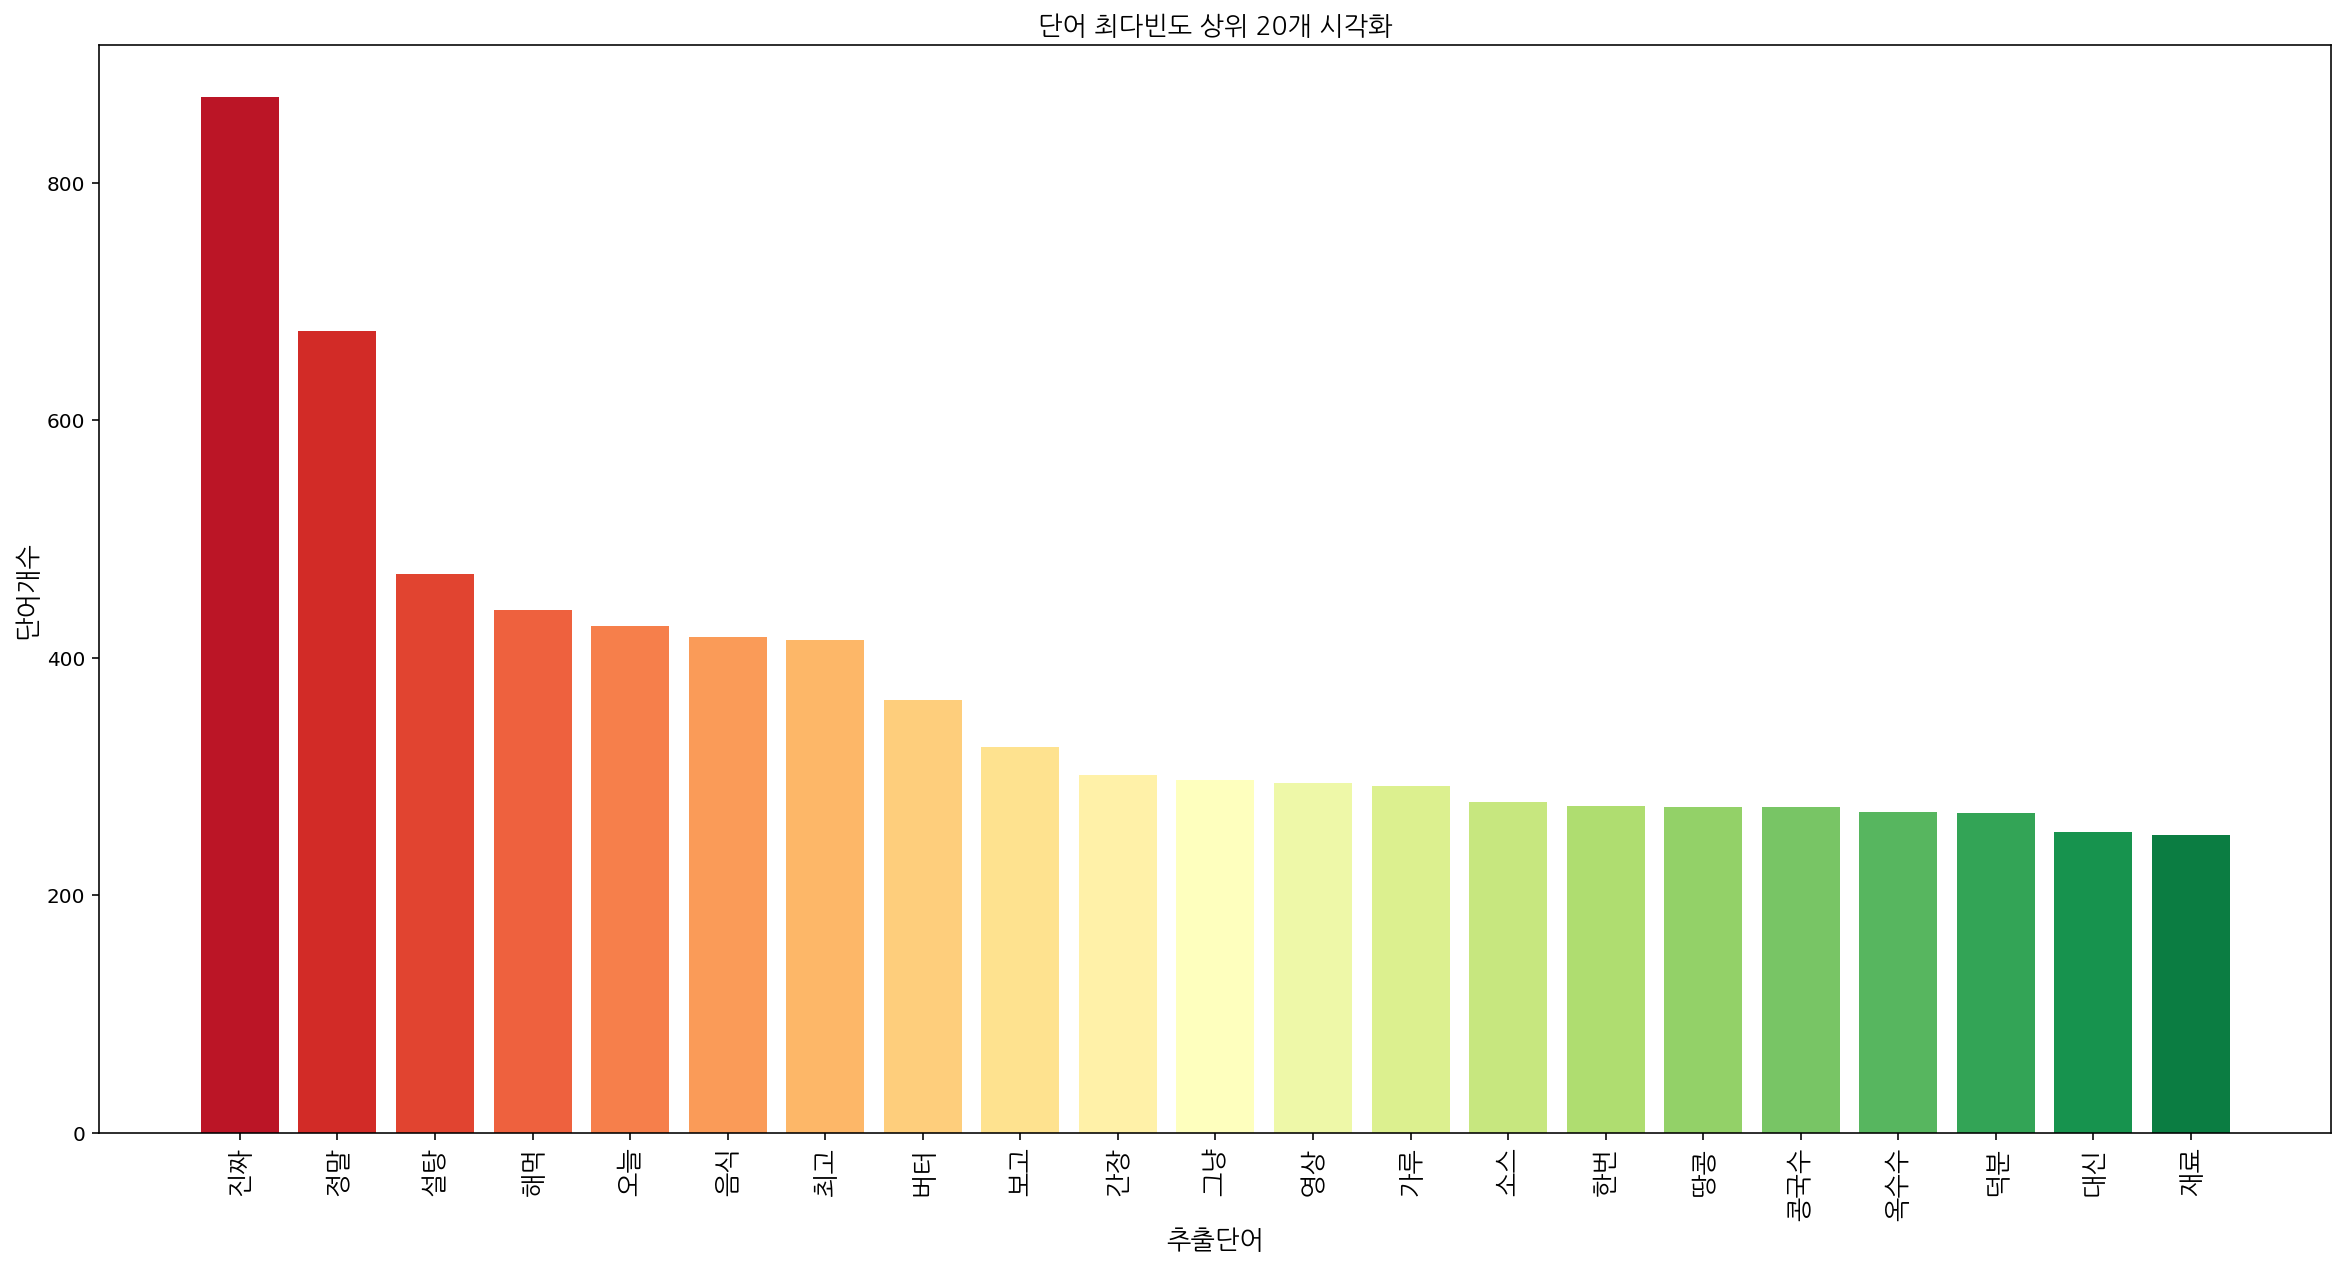

In [65]:
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})

for i in range(len(sorted_top20)):
    word = sorted_top20[i][0]
    count = sorted_top20[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('RdYlGn',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)

index = np.arange(len(test))
plt.bar(index,test['count'].tolist(),color=colors)
plt.xlabel('추출단어', fontsize=8, fontproperties=fontprop)
plt.ylabel('단어개수', fontsize=8, fontproperties=fontprop)
plt.xticks(index, test['word'].tolist(), fontsize=5, fontproperties=fontprop, rotation=90)
plt.title('단어 최다빈도 상위 20개 시각화',  fontsize=12, fontproperties=fontprop)
plt.rcParams['figure.figsize'] = [20, 10]
fig2 = plt.figure(1)
fig2.set_size_inches(20, 10) # 사이즈 조정

# plt.show()

### 빈도수 시각화2 : WordCloud

wordcloud에 사용된 BMHANNAPro.ttf file은 repository에 존재하지 않습니다.

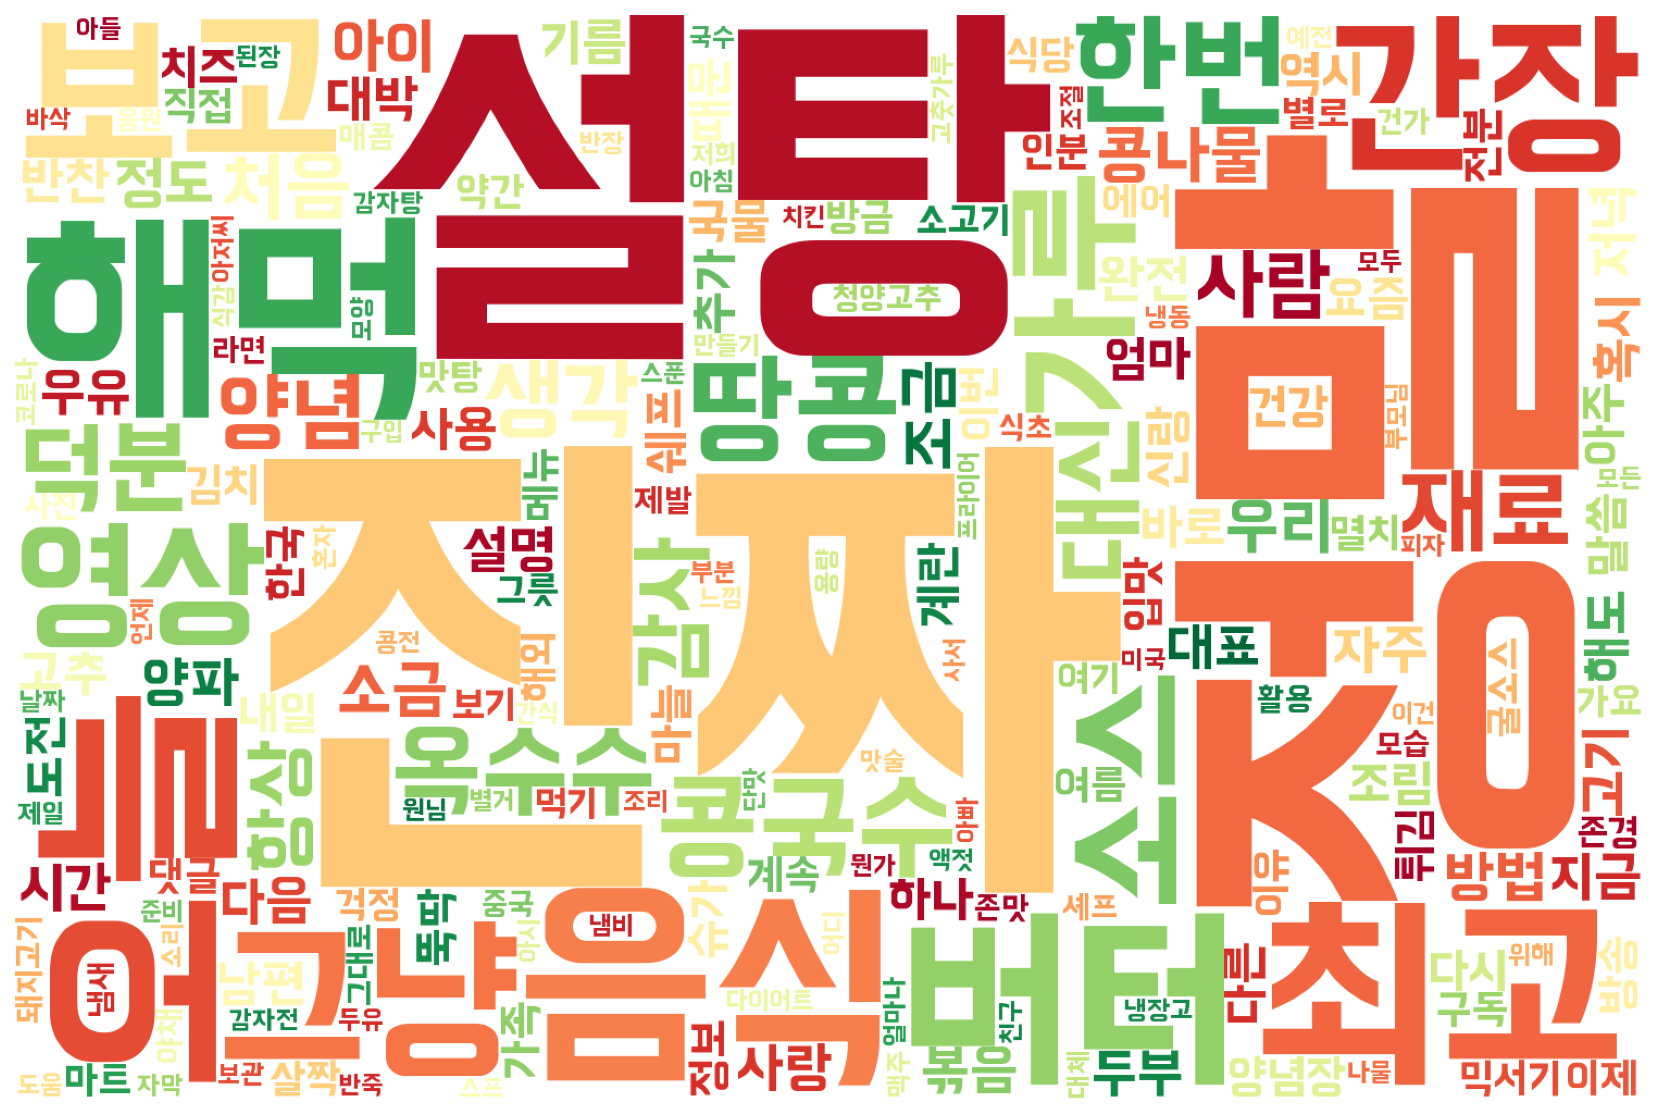

In [103]:
# from wordcloud import WordCloud # 텍스트 시각화
# import matplotlib.pyplot as plt # 시각화 패키지
# import matplotlib 
# from IPython.display import set_matplotlib_formats

#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Zipbob_textmining/BMHANNAPro.ttf', 
                      background_color='white',
                      colormap = "RdYlGn", 
                      width=1500,
                      height=1000).generate_from_frequencies(word_count_dict)

plt.imshow(wordcloud) 
plt.axis('off') 
# plt.show()

# 재료별 추천 레시피 추출하기

- 불용어사전 : 전체 데이터셋 불용어 사전과 동일

In [104]:
# 코드용 데이터 복사
df2 = df.copy()

## text_cleaning 함수 실행
- 텍스트 전처리 함수

In [105]:
# from sklearn.feature_extraction.text import CountVectorizer
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))

## 전체 데이터에서 재료-레시피 반복문 실행

In [109]:
final_resultlist = {}
final_resultlist['agri'] = []
final_resultlist['best1_recipe'] = []
final_resultlist['best2_recipe'] = []
final_resultlist['best3_recipe'] = []
final_resultlist['best4_recipe'] = []

for z in (df2['agri'].unique()) :
  agr_df = df2[df2['agri']==z]
  agr_resultlist = []

  for q in (agr_df['recipe'].unique()) :
    recipe_df = agr_df[agr_df['recipe']==q]

    try :
      bow_vect = vect.fit_transform(recipe_df['comment'].tolist())
      word_list = vect.get_feature_names()
      count_list = bow_vect.toarray().sum(axis=0)

      word_count_dict = dict(zip(word_list, count_list))
      word_count_dictlist = list(word_count_dict.keys())

      word_count_dictlist2 = []
      for k, v in zip(word_count_dict.keys(), word_count_dict.values()):
        word_count_dictlist2.append([k, v])

      pos_cnt = 0
      neg_cnt = 0

      for i in range(0, len(SentiWorddata)):
        for k in range(0, len(word_count_dictlist2)) :  # 데이터셋에서 최종 추출된 [단어, 빈도수] 리스트 길이만큼
          if SentiWorddata[i]['word'] == word_count_dictlist2[k][0]: # 사전에 등록된 word에 데이터셋단어
            knuword = [SentiWorddata[i]['word_root'], int(SentiWorddata[i]['polarity'])]

            if int(SentiWorddata[i]['polarity']) >= 0 :  # 그 어근의 점수가 0 이상이면
              pos_cnt += 1
            else :
              neg_cnt += 1
      
      if pos_cnt == 0 and neg_cnt == 0 :
        pos_rate = 0.5
        neg_rate = 0.5
      else :
        pos_rate = pos_cnt/(pos_cnt+neg_cnt)
        neg_rate = neg_cnt/(pos_cnt+neg_cnt)

    except :
        pos_rate = 0.5
        neg_rate = 0.5

    # 각 재료-레시피-비율 넣고
    agr_resultlist.append([q, pos_rate, neg_rate])

  agr_resultlist.sort(key=lambda x: -x[1])
  final_resultlist['agri'].append(z)
  if len(agr_resultlist) >= 4 : # 레시피 개수가 4개 이상인 경우만 순위대로 출력.
    final_resultlist['best1_recipe'].append(agr_resultlist[0][0])
    final_resultlist['best2_recipe'].append(agr_resultlist[1][0])
    final_resultlist['best3_recipe'].append(agr_resultlist[2][0])
    final_resultlist['best4_recipe'].append(agr_resultlist[3][0])
  else :
    final_resultlist['best1_recipe'].append(agr_resultlist[0][0])
    final_resultlist['best2_recipe'].append(agr_resultlist[0][0])
    final_resultlist['best3_recipe'].append(agr_resultlist[0][0])
    final_resultlist['best4_recipe'].append(agr_resultlist[0][0])

In [110]:
# 확인용
# print(agr_resultlist[0])
# print(final_resultlist)

['감귤_그라니따Tangerine_Granita_제철과일_디저트', 1.0, 0.0]


In [112]:
finaldf = pd.DataFrame(final_resultlist)

In [113]:
finaldf

,agri,best1_recipe,best2_recipe,best3_recipe,best4_recipe
0,콩,JzyYs3lV2Gs,Sxi31LRvr40,0q0btGvIrWY,iGhOobaQHso
1,메밀,2y4Jvvmj7LY,2y4Jvvmj7LY,2y4Jvvmj7LY,2y4Jvvmj7LY
2,고구마,aXJgN_JjYDg,#NAME?,G25SAhShmQw,QFTBQF5l0Ro
3,감자,스팸감자볶음만들기,간단하게_해먹는_간식_휴게소감자_버터구이감자,No_감자새우덮밥_고급스러운_중식덮밥,실패없이_만드는_밥도둑_감자스팸간장조림_황금레시피
4,수수,yI67M3IS4GI,VNw-hUTboNs,uB37XeU5SwM,9YlFFVisCBY
5,배추,Uuo8iv0pTEk,Uuo8iv0pTEk,Uuo8iv0pTEk,Uuo8iv0pTEk
6,토마토,kWBAoeDR2a8,kWBAoeDR2a8,kWBAoeDR2a8,kWBAoeDR2a8
7,파,2ZDmN3xReA4,2ZDmN3xReA4,2ZDmN3xReA4,2ZDmN3xReA4
8,가지,전자레인지_분_완성_가지무침_레시피,가지구이무침_가지_싫어하는_신랑님_입맛_사로잡은_가지요리,백종원_가지밥_이거_진짜_강추,가지나물_들깨_무침_가지로_만들_수_있는_요리_가지가지
9,새우,HHxrciV2-MU,zB951RGv1EI,5WSftQYmMe8,11lVLe1vnb0


데이터프레임 파일 저장 코드(필요시 사용)

In [114]:
finaldf.to_csv('/content/drive/MyDrive/Zipbob_textmining/recipe_recommend_best4output.csv', index=False, encoding='cp949')